In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/zoomify/report.tsv"

tool_pretty_names = {
    "cooler_st_cooler": "cooler",
    "cooler_mt4_cooler": "cooler (4 CPUs)",
    "cooler_mt8_cooler": "cooler (8 CPUs)",
    "hictk_cooler": "hictk (cooler)",
    "hictk_st_hic": "hictk (hic)",
    "hictk_mt4_hic": "hictk (hic, 4 CPUs)",
    "hictk_mt8_hic": "hictk (hic, 8 CPUs)",
}

resolutions_pretty = {
    10: "10",
    20: "20",
    50: "50",
    100: "100",
    200: "200",
    500: "500",
    1000: "1k",
    2000: "2k",
    5000: "5k",
    10000: "10k",
    20000: "20k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    200000: "200k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "blue", "midnightblue", "forestgreen", "orange", "chocolate", "red"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df

,tool,format,resolution,time,memory,time_min,memory_gb,resolution_pretty
43,cooler,cooler,20,24618.96,32475036,410.316000,32.475036,20
148,cooler,cooler,20,24496.53,32475116,408.275500,32.475116,20
253,cooler,cooler,20,24704.02,32474916,411.733667,32.474916,20
13,cooler (4 CPUs),cooler,20,13017.65,31563152,216.960833,31.563152,20
118,cooler (4 CPUs),cooler,20,12885.17,31563212,214.752833,31.563212,20
...,...,...,...,...,...,...,...,...
165,"hictk (hic, 4 CPUs)",hic,1000000,121.19,1469532,2.019833,1.469532,1M
270,"hictk (hic, 4 CPUs)",hic,1000000,120.77,1469428,2.012833,1.469428,1M
75,"hictk (hic, 8 CPUs)",hic,1000000,122.16,1468644,2.036000,1.468644,1M
180,"hictk (hic, 8 CPUs)",hic,1000000,120.77,1468760,2.012833,1.468760,1M


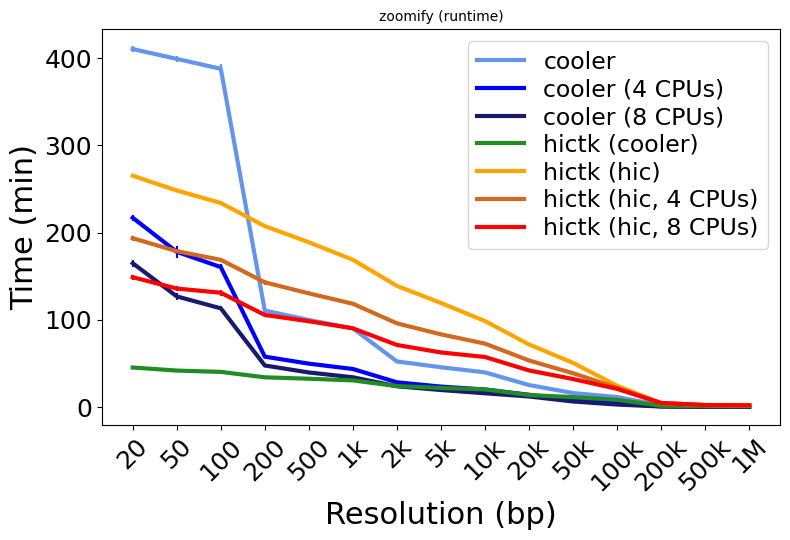

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))


sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=True,
)


ax.set(title="zoomify (runtime)", ylabel="Time (min)", xlabel="Resolution (bp)")

ax.tick_params(axis="x", rotation=45)

ax.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="cooler (4 CPUs)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="cooler (8 CPUs)"),
        Line2D([0], [0], color=color_palette[3], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color=color_palette[4], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color=color_palette[5], lw=3, label="hictk (hic, 4 CPUs)"),
        Line2D([0], [0], color=color_palette[6], lw=3, label="hictk (hic, 8 CPUs)"),
    ],
    labelspacing=0.2,
    loc="upper right",
)

loc = plticker.MultipleLocator(base=100)
ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/zoomify_runtime.png", dpi=600)
fig.savefig("/tmp/zoomify_runtime.svg")

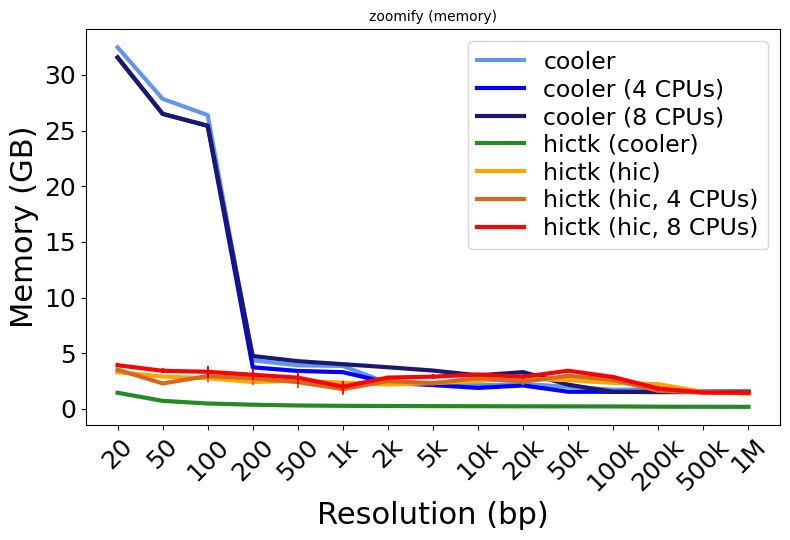

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=False,
)

ax.set(title="zoomify (memory)", ylabel="Memory (GB)", xlabel="Resolution (bp)")

ax.tick_params(axis="x", rotation=45)

ax.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="cooler (4 CPUs)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="cooler (8 CPUs)"),
        Line2D([0], [0], color=color_palette[3], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color=color_palette[4], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color=color_palette[5], lw=3, label="hictk (hic, 4 CPUs)"),
        Line2D([0], [0], color=color_palette[6], lw=3, label="hictk (hic, 8 CPUs)"),
    ],
    labelspacing=0.2,
)

loc = plticker.MultipleLocator(base=5)
ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/zoomify_memory.png", dpi=600)
fig.savefig("/tmp/zoomify_memory.svg")